# Irreducible error and bias

On [Simple Linear Regression 3.1](https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/courseware/85b01caa12834b0dbaeff232fb77e123/441b6190c14e46c29493ae9dcc41eb05/) Robert Tibshirani says:

> So although this model is very simple--
> I think there's been sort of a tendency of people to think
> simple is bad.
> We want to use things that are complicated and fancy and
> impressive.
> Well, actually, I want to say the opposite.
> Simple is actually very good.
> And this model being very simple, it actually works
> extremely well in a lot of situations.

and then

> But for the most part, the linear approximation is
> reasonable, partly because, again, the amount of noise
> around the curve, around the line, is quite large.
> So even the actual regression function was nonlinear, we
> wouldn't be able to see it from this data.«
> So this is an example of how it's this crude approximation,
> which is potentially quite useful.

We'll try to see how (and if) this is true.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Linear and non-linear functions

Given two functions, a linear and a non-linear one:

In [2]:
def f_non_linear(x): return 10 + 3 * x + 8 * math.sin(x)

def f_linear(x): return 10 + 3 * x

Lets plot both:

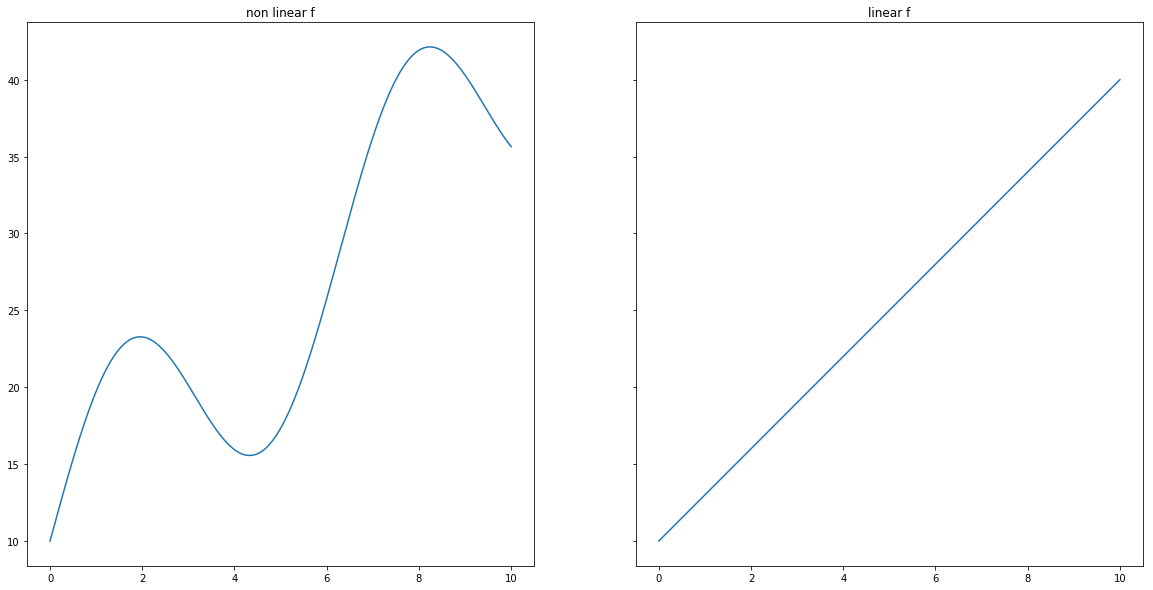

In [68]:
def get_axes():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
    return ax1, ax2

n_samples = 10000
xs = np.linspace(0, 10, n_samples)
ys = [f_non_linear(x) for x in xs]
ys_l = [f_linear(x) for x in xs]

ax1, ax2 = get_axes()

ax1.plot(xs, ys)
ax1.set_title('non linear f')
ax2.plot(xs, ys_l)
ax2.set_title('linear f');

Let's now add a noise / irreducible error component and try to fit a simple linear regression on both.

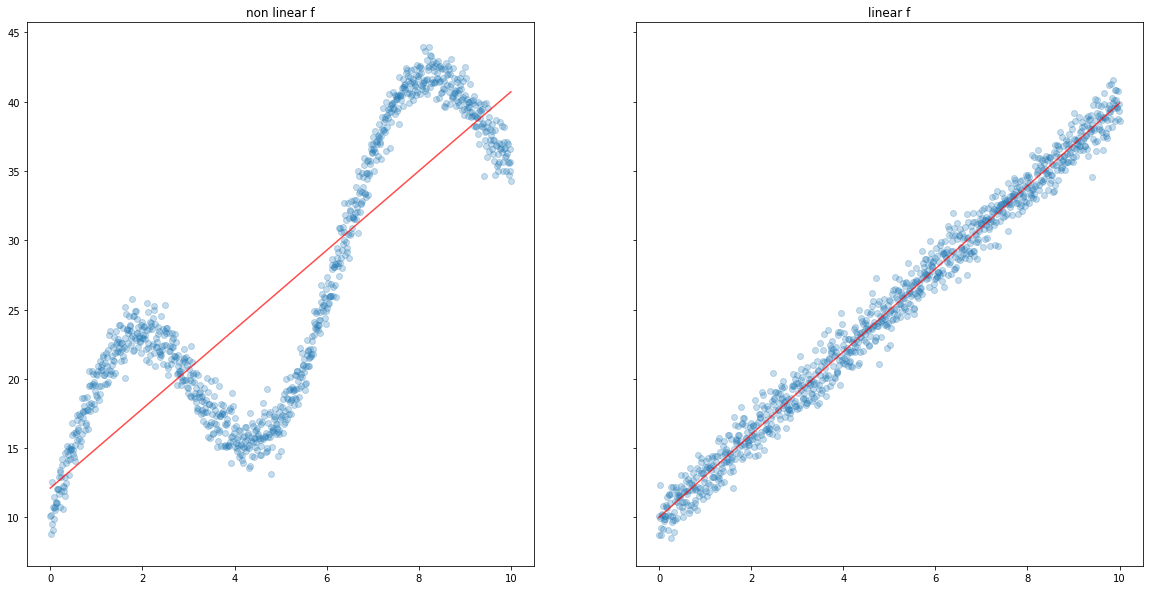

In [73]:
def get_slope_and_intercept(x, y):
  lr = LinearRegression()
  lr.fit(x.reshape(-1, 1), y)
  return lr.coef_, lr.intercept_

n_samples = 1000
xs = np.linspace(0, 10, n_samples)
small_noise = np.random.normal(0, 1, n_samples)

ax1, ax2 = get_axes()

# non linear first
non_linear_ys = [f_non_linear(x) for x in xs]
small_noisy_non_linear_ys = non_linear_ys + small_noise
ax1.scatter(xs, small_noisy_non_linear_ys, alpha=0.25)

# fit and draw a linear regression
nonlinear_coef, nonlinear_intercept = get_slope_and_intercept(xs, small_noisy_non_linear_ys)
non_linear_pred = [x * nonlinear_coef + nonlinear_intercept for x in xs]
ax1.plot(xs, non_linear_pred, color='red', alpha=0.7)
ax1.set_title('non linear f')

# now the same with the linear f
linear_ys = [f_linear(x) for x in xs]
small_noisy_linear_ys = linear_ys + small_noise
ax2.scatter(xs, small_noisy_linear_ys, alpha=0.25)

# and its linear regression
linear_coef, linear_intercept = get_slope_and_intercept(xs, small_noisy_linear_ys)
linear_ypred = [x * linear_coef + linear_intercept for x in xs]
ax2.plot(xs, linear_ypred, color='red', alpha=0.7)
ax2.set_title('linear f');

There's clearly a lot of __bias error__ on the first fit, when the relation between X and y is non-linear. We can check this by seeing the variance of the residuals:

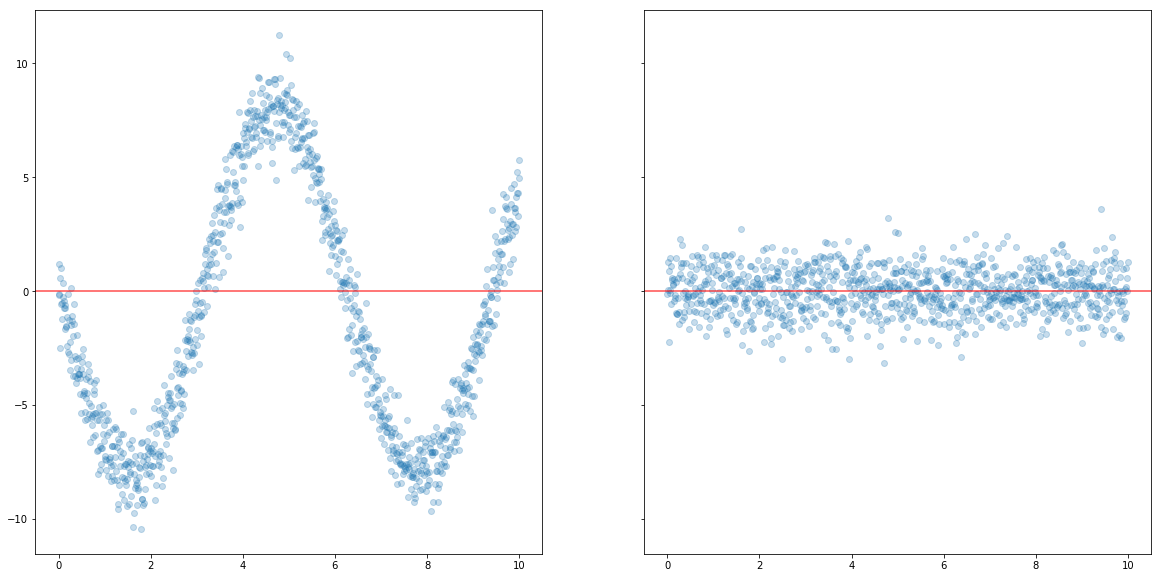

In [75]:
ax1, ax2 = get_axes()
non_linear_residuals = np.array(non_linear_ypred).reshape(-1, 1) - small_noisy_non_linear_ys.reshape(-1, 1)
ax1.axhline(0, color='red', alpha=0.7)
ax1.scatter(xs, non_linear_residuals, alpha=0.25)

linear_residuals = np.array(linear_ypred).reshape(-1, 1) - small_noisy_linear_ys.reshape(-1, 1)
ax2.axhline(0, color='red', alpha=0.7)
ax2.scatter(xs, linear_residuals, alpha=0.25);

Clearly, on the linear case (when there's no bias) residuals are normally distributed around the regression line. This is not the case on the nonlinear function.

We can confirm this by seeing the residuals distributions:

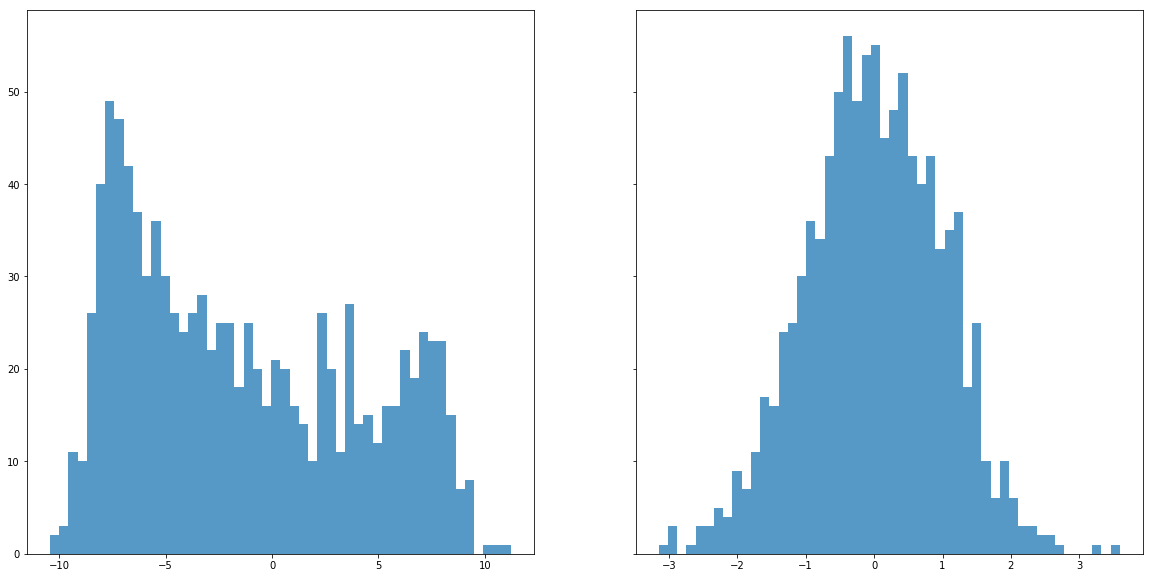

In [82]:
ax1, ax2 = get_axes()

ax1.hist(non_linear_residuals, bins=50, alpha=0.75)
ax2.hist(linear_residuals, bins=50, alpha=0.75);

But, a key part of Tibshirani's phrase is:

> But for the most part, the linear approximation is reasonable, partly because, again, the amount of noise around the curve, around the line, __is quite large__

How large? we used a very small noise, with a standard deviation of 1. Lets increase the noise by an order of magnitude.

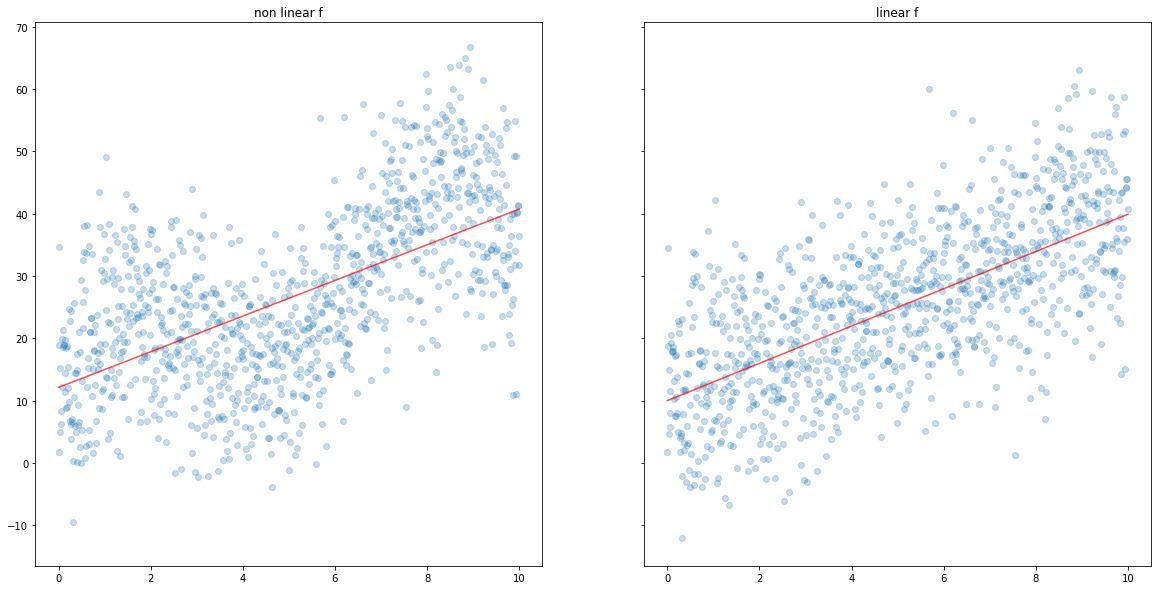

In [86]:
# most of this code is identical to the one on top, it's not DRY to make it easier to see what's going on

n_samples = 1000
xs = np.linspace(0, 10, n_samples)
big_noise = np.random.normal(0, 10, n_samples)

ax1, ax2 = get_axes()

# non linear first
non_linear_ys = [f_non_linear(x) for x in xs]
big_noisy_non_linear_ys = non_linear_ys + big_noise
ax1.scatter(xs, big_noisy_non_linear_ys, alpha=0.25)

# fit and draw a linear regression
nonlinear_coef, nonlinear_intercept = get_slope_and_intercept(xs, small_noisy_non_linear_ys)
non_linear_pred = [x * nonlinear_coef + nonlinear_intercept for x in xs]
ax1.plot(xs, non_linear_pred, color='red', alpha=0.7)
ax1.set_title('non linear f')

# now the same with the linear f
linear_ys = [f_linear(x) for x in xs]
big_noisy_linear_ys = linear_ys + big_noise
ax2.scatter(xs, big_noisy_linear_ys, alpha=0.25)

# and its linear regression
linear_coef, linear_intercept = get_slope_and_intercept(xs, small_noisy_linear_ys)
linear_ypred = [x * linear_coef + linear_intercept for x in xs]
ax2.plot(xs, linear_ypred, color='red', alpha=0.7)
ax2.set_title('linear f');

Now things start to get interesting, the linear fit on the non-linear function doesn't look to bad. Let's check the residuals distribution:

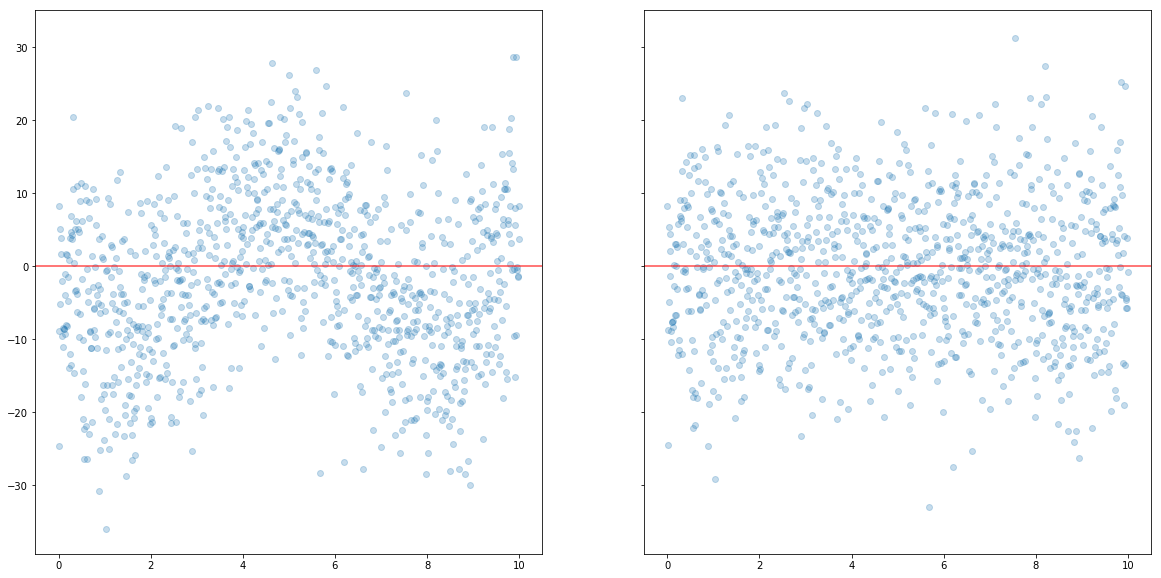

In [89]:
ax1, ax2 = get_axes()
non_linear_residuals = np.array(non_linear_ypred).reshape(-1, 1) - big_noisy_non_linear_ys.reshape(-1, 1)
ax1.axhline(0, color='red', alpha=0.7)
ax1.scatter(xs, non_linear_residuals, alpha=0.25)

linear_residuals = np.array(linear_ypred).reshape(-1, 1) - big_noisy_linear_ys.reshape(-1, 1)
ax2.axhline(0, color='red', alpha=0.7)
ax2.scatter(xs, linear_residuals, alpha=0.25);

And their distributions on a histogram:

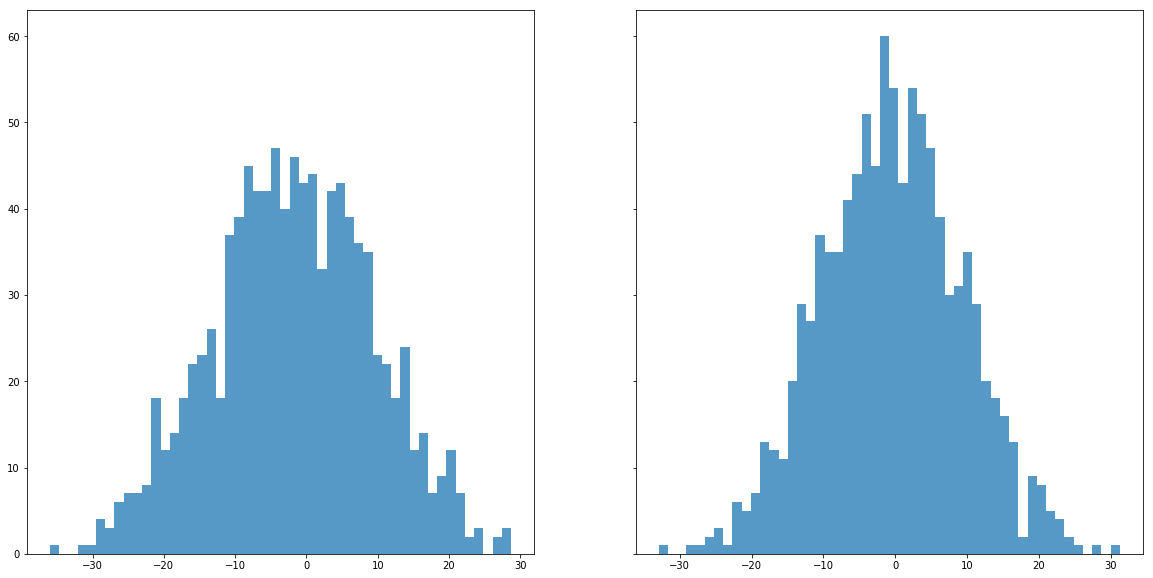

In [91]:
ax1, ax2 = get_axes()

ax1.hist(non_linear_residuals, bins=50, alpha=0.75)
ax2.hist(linear_residuals, bins=50, alpha=0.75);

Effectively, as the irreducible error (or noise) increases, fitting a linear model on a noisy non-linear function is not a bad choice at all.

Do the non-linear residuals follow a normal distribution around zero? It certainly looks like they do, but instead of guessing we could use a "normality test", found in the `scipy.stats` package:

In [110]:
from scipy.stats import normaltest

def is_normal(xs, alpha=0.05):
    pvalue = normaltest(xs).pvalue[0]
    print('pvalue = {}'.format(pvalue))
    if pvalue > alpha:
        print("we can't reject the null hypotesis, the distribution looks normal")
    else:
        print("we reject the null hypotesis, the distribution is not normal")
    
is_normal(linear_residuals)
is_normal(non_linear_residuals)

pvalue = 0.8281379225766974
we can't reject the null hypotesis, the distribution looks normal
pvalue = 0.0840554954508777
we can't reject the null hypotesis, the distribution looks normal


Even though the p-value is smaller, __we can't reject the null hypotesis__ and we must assume the distribution is normal. This effect is even more clear as noise increases.